# Work preparation

## libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import warnings
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

from os.path import join
from IPython import display
from sklearn.datasets import load_digits
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score # и другие метрики
from sklearn.cluster import KMeans # а также другие алгоритмы
from sklearn.preprocessing import StandardScaler

In [3]:
from scipy.stats import f_oneway
from statsmodels.multivariate.manova import MANOVA
from scipy.stats.mstats import kruskal
import scikit_posthocs as sp

In [4]:
ppalette={'senior academics':'r', 'students':'g'}

## data import and preprocessing

In [5]:
students = pd.read_csv('students.tsv',sep='\t' )
dolgolets = pd.read_csv('dolgolets.tsv', sep = '\t')

In [6]:
students.columns = ['ID', 'квота сек', 'Слово', 'Предыдущее + слово', 'Первая_буква',
       'Стратегия', 'Порядок_буква', 'Порядок_весь_тест', 'Частотность',
       'Пауза', 'VP', 'VS', 'N of words', 'N of words_P', 'N of words_O',
       'N of words_S', 'Mean pause']

dolgolets.loc[(dolgolets['ID']=='pr_A_1') & (dolgolets['Слово']=='оква'), 'Стратегия']=11
dolgolets.loc[(dolgolets['ID']=='pr_G_1') & (dolgolets['Стратегия']=='9'),'Стратегия']=1
dolgolets.loc[(dolgolets['ID']=='pr_I_1') & (dolgolets['Стратегия']=='9'),'Стратегия']=3
dolgolets.loc[(dolgolets['ID']=='pr_K_1') & (dolgolets['Стратегия']=='9'),'Стратегия']=2
dolgolets.loc[(dolgolets['ID']=='pr_L_1') & (dolgolets['Стратегия']=='9') & (dolgolets['Слово']=='овеин'),'Стратегия']=8
dolgolets.loc[(dolgolets['ID']=='pr_L_1') & (dolgolets['Стратегия']=='9') & (dolgolets['Слово']=='сапан'),'Стратегия']=8
dolgolets.loc[(dolgolets['ID']=='pr_M_2') & (dolgolets['Стратегия']=='9') ,'Стратегия']=8
dolgolets.loc[(dolgolets['ID']=='pr_N_2') & (dolgolets['Стратегия']=='9') & (dolgolets['Слово']=='олелуй'),'Стратегия']=1
dolgolets.loc[(dolgolets['ID']=='pr_N_2') & (dolgolets['Стратегия']=='9') & (dolgolets['Слово']=='сопсизм'),'Стратегия']=8
dolgolets.loc[(dolgolets['ID']=='pr_S_1') & (dolgolets['Стратегия']=='9') ,'Стратегия']=4
dolgolets.loc[(dolgolets['ID']=='pr_T_1') & (dolgolets['Стратегия']=='9') ,'Стратегия']=8


dolgolets.loc[(dolgolets['ID']=='pr_N_2') & (dolgolets['Стратегия']=='9') & (dolgolets['Слово']=='перл'), 'Стратегия' ]=8
dolgolets.loc[(dolgolets['ID']=='pr_L_1') & (dolgolets['Стратегия']=='9') & (dolgolets['Слово']=='скрип'),'Стратегия'] = 11

dolgolets = dolgolets[students.columns]
dolgolets['type'] = 'senior academics'
students['type'] = 'students'

df = pd.concat([students, dolgolets])

df['Стратегия'] = df['Стратегия'].astype(str)
#df[df['Стратегия'].notnull()].Стратегия.astype('int32', errors = 'ignore')
df['Стратегия'] = df['Стратегия'].str.replace(r'.0', '')
df['Частотность'] = df['Частотность'].str.replace(r',', '.')
df['Частотность'] = df['Частотность'].astype('float', errors = 'ignore')
df['Пауза'] = df['Пауза'].str.replace(r',', '.')
df['Пауза'] = df['Пауза'].astype('float', errors='ignore' )
df['Порядок_буква'] = df['Порядок_буква'].astype(str)
df['Порядок_буква'] = df['Порядок_буква'].str.replace(r'.0', '')
df['Предыдущее + слово'] = df['Предыдущее + слово'].str.split(' ')

df1 = df.groupby("ID").agg(list)
df1['N of words_O'] = df1['N of words_O'].str[0]
df1['N of words'] = df1['N of words'].str[0]
df1['N of words_P'] = df1['N of words_P'].str[0]
df1['N of words_S'] = df1['N of words_S'].str[0]
df1['Mean pause'] = df1['Mean pause'].str[0]
df1['type'] = df1['type'].str[0]

In [7]:
def count_values_freq(lst):
    freq_dict = {}
    for value in lst:
        if value in freq_dict:
            freq_dict[value] += 1
        else:
            freq_dict[value] = 1
    return freq_dict
df1['strategyfreq_dict'] = df1['Стратегия'].apply(count_values_freq)

In [8]:
df = df1[['strategyfreq_dict']]

def expand_dict_column(row):
    for key, value in row['strategyfreq_dict'].items():
        row[key] = int(value)
    return row

# Применяем функцию к каждой строке DataFrame
df = df.apply(expand_dict_column, axis=1)

# Удаляем столбец со словарями (если требуется)
#df.drop('dict_column', axis=1, inplace=True)



# Выводим DataFrame с новыми столбцами
df = df.fillna(0)
df['1'] = df['1'] + df['11'] + df['1а']
df['2'] = df['2'] + df['22'] + df['2а']
df['3'] = df['3'] + df['33'] + df['3a'] + df['3а'] + df['3а’']
df['4'] = df['4'] + df['4а']
df['6'] = df['6'] + df['66']

columns_to_drop = ['11', '1а', '22', '2а',  '33', '3a', '3а', '3а’', '4а', '66']
df = df.drop(columns=columns_to_drop)

df['fonetics'] = df['1'] 
df['derivation'] = df['2']
df['lexico-semantic field'] = df['3'] + df['4'] + df['5'] + df['6'] + df['7']
df['other'] = df['8']
columns_to_drop = ['1', '2', '3', '4',  '5', '6', '7', '8']
df = df.drop(columns=columns_to_drop)
df.columns
df = df.drop(['nan'], axis=1)
df.head()
df = df.drop(['strategyfreq_dict'], axis = 1)

df['strat_sum'] = df['fonetics'] + df['derivation'] + df['lexico-semantic field'] + df['other']

dff = df.copy()
for col in dff.columns[:-1]:  # Исключаем последний столбец strat_sum
    dff[col] = dff[col] / df['strat_sum']

dff = dff.drop(['strat_sum'], axis = 1)
dff.head()

,fonetics,derivation,lexico-semantic field,other
ID,,,,
pr_A_1,0.227273,0.113636,0.295455,0.363636
pr_B_1,0.196078,0.058824,0.313725,0.431373
pr_E_1,0.096154,0.019231,0.192308,0.692308
pr_G_1,0.254545,0.018182,0.127273,0.600000
pr_I_1,0.083333,0.020833,0.187500,0.708333


In [9]:
df.head()

,fonetics,derivation,lexico-semantic field,other,strat_sum
ID,,,,,
pr_A_1,10.0,5.0,13.0,16,44.0
pr_B_1,10.0,3.0,16.0,22,51.0
pr_E_1,5.0,1.0,10.0,36,52.0
pr_G_1,14.0,1.0,7.0,33,55.0
pr_I_1,4.0,1.0,9.0,34,48.0


<Axes: xlabel='strat_sum', ylabel='Count'>

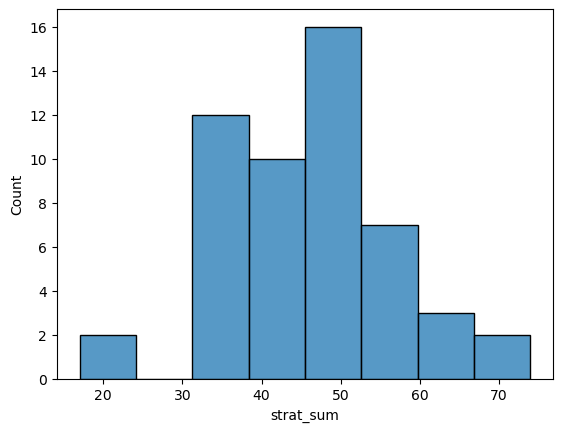

In [10]:
sns.histplot(df['strat_sum'])

In [11]:
df1.columns

Index(['квота сек', 'Слово', 'Предыдущее + слово', 'Первая_буква', 'Стратегия',
       'Порядок_буква', 'Порядок_весь_тест', 'Частотность', 'Пауза', 'VP',
       'VS', 'N of words', 'N of words_P', 'N of words_O', 'N of words_S',
       'Mean pause', 'type', 'strategyfreq_dict'],
      dtype='object')

In [12]:
analysis_df = df1[['квота сек', 'Первая_буква',
       'Порядок_буква', 'Порядок_весь_тест','Частотность', 'strategyfreq_dict','Пауза', 
       'Mean pause', 'type']]

analysis_df = pd.concat([analysis_df, dff], axis=1)

In [16]:
df.head()

,fonetics,derivation,lexico-semantic field,other,strat_sum
ID,,,,,
pr_A_1,10.0,5.0,13.0,16,44.0
pr_B_1,10.0,3.0,16.0,22,51.0
pr_E_1,5.0,1.0,10.0,36,52.0
pr_G_1,14.0,1.0,7.0,33,55.0
pr_I_1,4.0,1.0,9.0,34,48.0


In [23]:
humans = df.join(df1[['type']])
humans.to_csv('humans.tsv', sep='\t')


In [27]:
words = pd.concat([students, dolgolets])
words.to_csv('words.tsv', sep='\t')